<h1>Twitter Data Visualization or #nerd Dataset With Pandas and Matplotlib</h1>
<h2>Plotting Frequency Distributions</h2>
<p>In these lessons, you will learn how to use the matplotlib and pandas libraries to do some basic visualization of Twitter data.</p>
<p>We will be working with the simplified version of the dataset we created in Lesson 3 in which we reduced it from a JSON to a CSV (comma-separated values) format. In this lesson we will use the pandas read_csv function to import the data as a dataframe. </p>
<p>The original dataset was created using the Twitter Search API and searching on the hashtag 'nerd'. Tweets were collected every 15 minutes and saved to a file. After two weeks the files were processed to remove duplicate tweets and combined into a single file. Duplicate tweets are an artifact of requesting the maximum number of tweets for each 15 minute epoch. Twitter limits the Search API to 100 tweets per 15 minute epoch. They post 150 in their documentation but we have observed it to be 100. </p>

<h2>Import Packages</h2>
<p>As always, we import the required Python packages.</p>

In [2]:
import csv
import re
import datetime
import os
import sys
import math
import matplotlib.pyplot as plt
import json
import pandas as pd
from textblob import TextBlob
from pprint import pprint

<h2>Import Tweet Data Into Pandas Dataframe</h2>
<p>First, we import the data from the 'nerd_main.csv' file located in the 'csv' directory which we created in a previous lesson, and we print out the first 5 lines using the pandas 'head' function.</p>

In [3]:
dftweet = pd.read_csv('csv/nerd_main.csv')
dftweet.tweet_created_at = pd.to_datetime(dftweet.tweet_created_at)
dftweet.head()

,tweet_id,tweet_created_at,language,user_screen_name,user_created_at,user_id,followers_count,friends_count,time_zone,utc_offset,retweeted_status,retweet_id,retweet_user_screen_name,retweet_user_id
0,1018178822087192581,2018-07-14 17:02:02,es,Huntersephiroth,Mon Jan 02 22:18:36 +0000 2012,453415076,48,229,None,None,1,1018173447581720576,LuisGyG,824881
1,1018179236220297216,2018-07-14 17:03:41,en,WikakomSteam,Thu May 05 17:26:18 +0000 2016,728274635712770049,5589,3475,None,None,0,None,None,None
2,1018179317392650241,2018-07-14 17:04:00,en,Book4Creative,Sat Jul 15 18:30:51 +0000 2017,886291986596192258,24,29,None,None,1,987399508509282305,Book4Creative,886291986596192258
3,1018179688093478912,2018-07-14 17:05:29,en,Voldrega,Tue May 24 02:43:55 +0000 2011,304189053,314,405,None,None,0,None,None,None
4,1018180125697830912,2018-07-14 17:07:13,en,Voldrega,Tue May 24 02:43:55 +0000 2011,304189053,314,405,None,None,0,None,None,None


<h2>Create List of Most Retweeted Tweets and Most Frequent Tweeters</h2>
<p>Next, we will use the pandas 'groupby' function to create a sorted list of the most frequently retweeted tweets and the Twitter users who tweeted most frequently,and we print out the top 20 from each list along with their counts. </p>

In [4]:
topretweets = dftweet.groupby('retweet_id').size().sort_values(ascending=False).reset_index()
topretweeted = dftweet.groupby('retweet_user_screen_name').size().sort_values(ascending=False).reset_index()
print(topretweets[:20])
print(topretweeted[:20])

             retweet_id     0
0                  None  8640
1   1019765122468892672   116
2   1019910849773948928    71
3   1021435234691117057    64
4   1022909350174584832    60
5   1022281439310573568    54
6   1020366819884904448    52
7   1022852817902391296    50
8   1022870158052872193    38
9   1019990534830673920    37
10  1022324481870704640    36
11  1019669712823881728    28
12  1019926613784481792    28
13  1022565302662455296    27
14  1020417349252415488    24
15  1021589547543613440    23
16  1018967936638291968    21
17  1021526708632018944    20
18  1019263737583357953    19
19  1020181165175713793    19
   retweet_user_screen_name     0
0                      None  8640
1                SleekDeals  1771
2               RETROTOYING   297
3             SuperDealsite   262
4                   jela9ja   164
5               OneYoungsta   134
6              planvoficial   116
7           HotUSDailyDeals   115
8            Readwhenstoned    90
9           WeLuvNerdiGirls   

<h2>Plot the Tweet Frequency Distribution of the Entire #nerd Dataset</h2>
<p>Next, let's create a plot of the tweet counts per 5 minute epoch for the #nerd dataset. We will include a title and label the axes, enable a grid, and save the resulting plot as a PNG image file. </p>

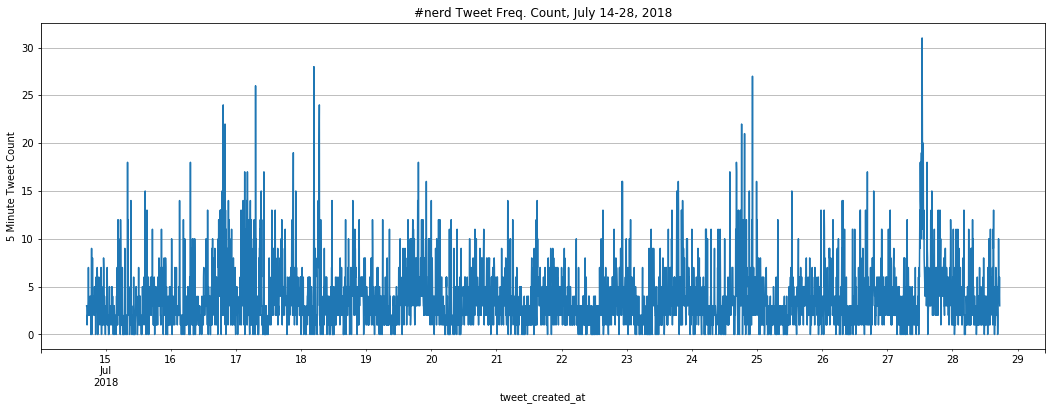

In [5]:
dftweet.groupby(pd.Grouper(key='tweet_created_at', freq='5Min', convention='start')).size().plot(figsize=(18,6))
plt.ylabel('5 Minute Tweet Count')
plt.title('#nerd Tweet Freq. Count, July 14-28, 2018')
plt.grid(True)
plt.savefig("images/nerd_tweet_freq_count_jul14to28_2018.png")

<h2>Plot Frequency Distributions for Each of the Top 20 Tweets</h2>
<p>Finally, we will plot similar frequency distributions for each of the top 20 most frequently retweeted tweets in the #nerd dataset, including title, axes labels, grid, and saved PNG image. </p>

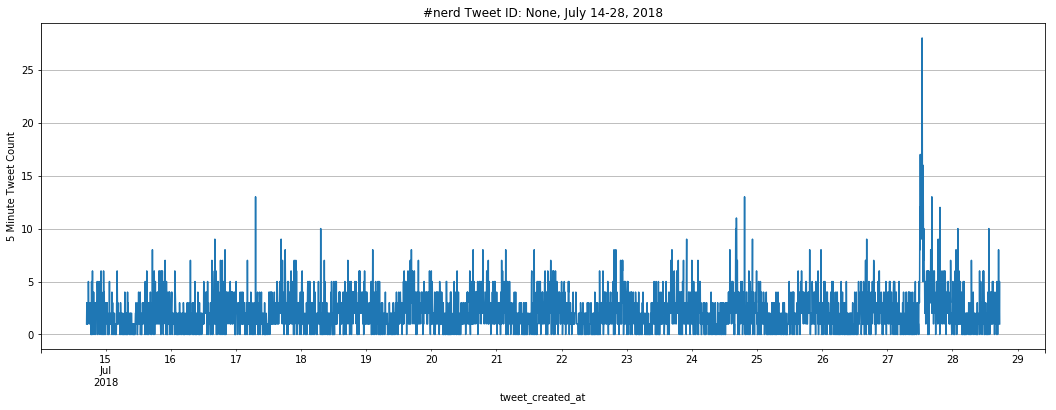

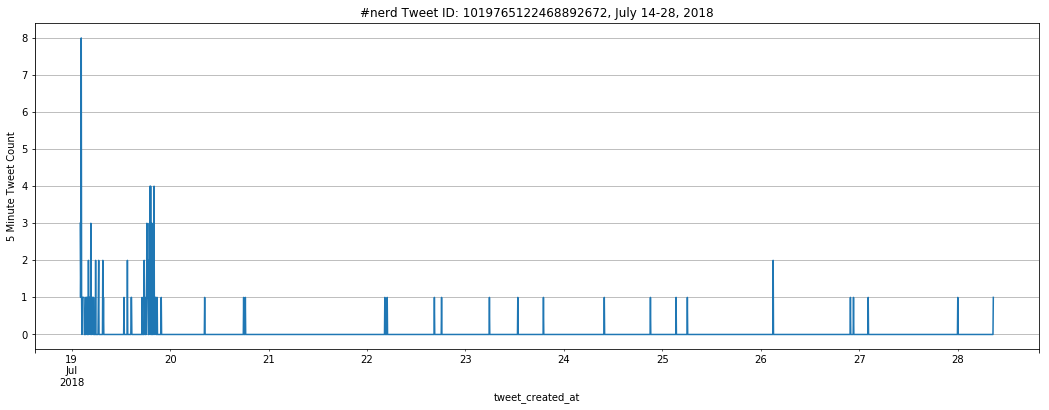

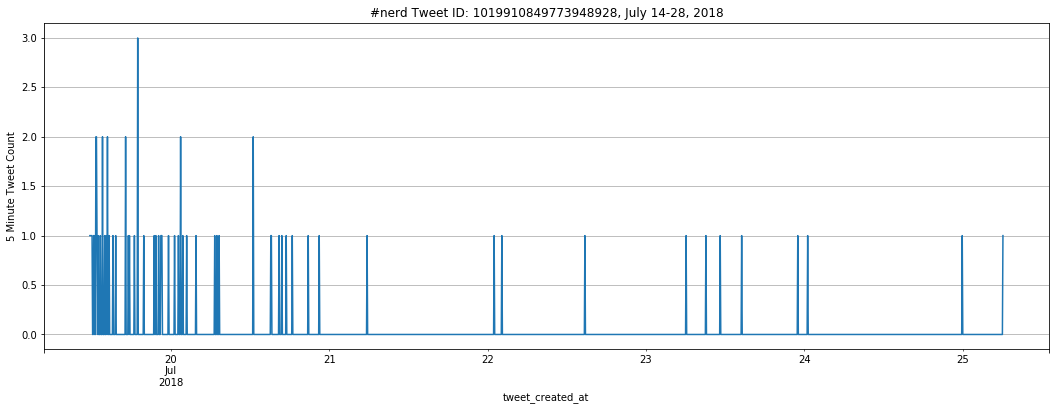

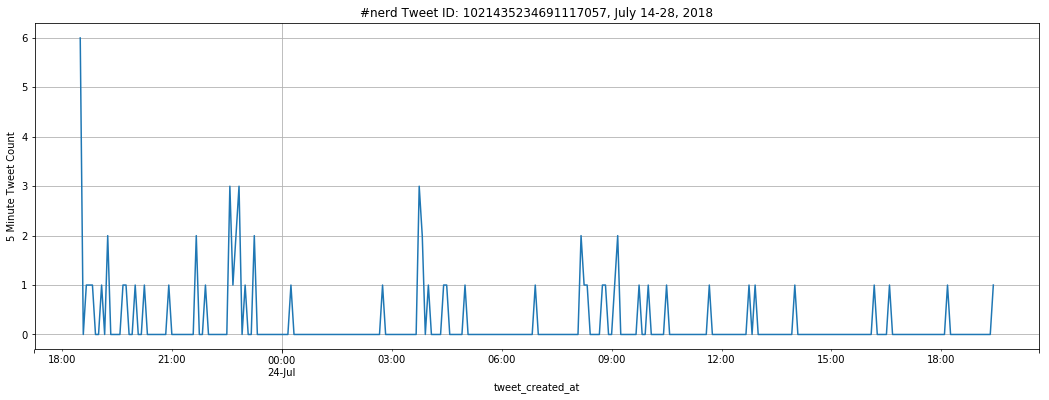

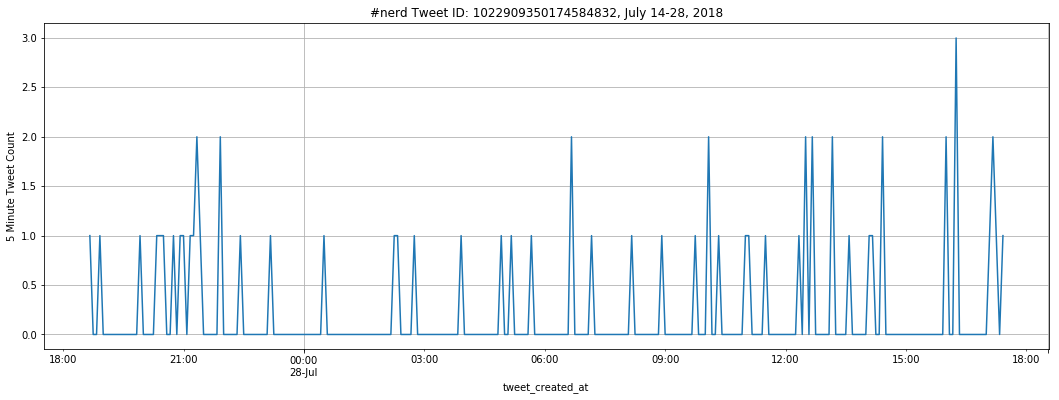

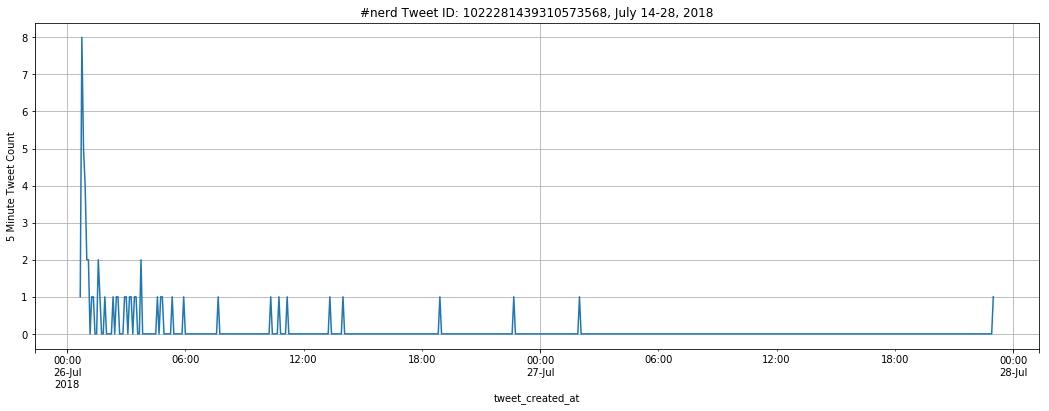

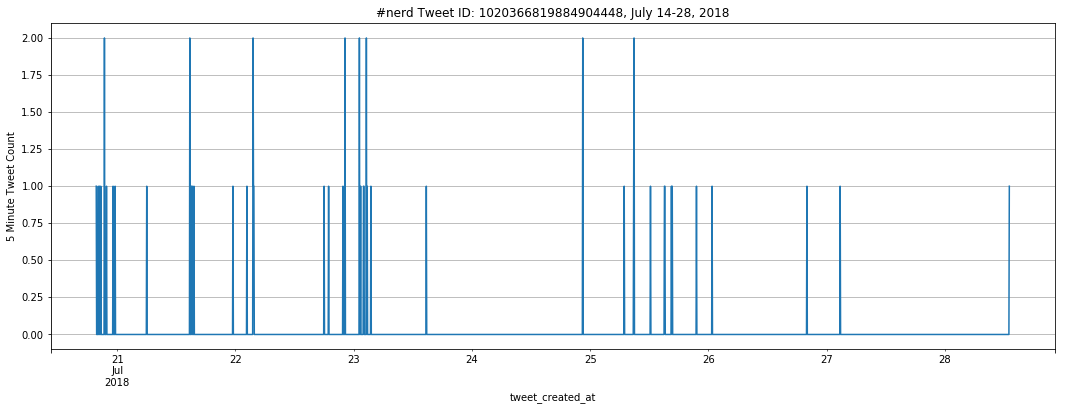

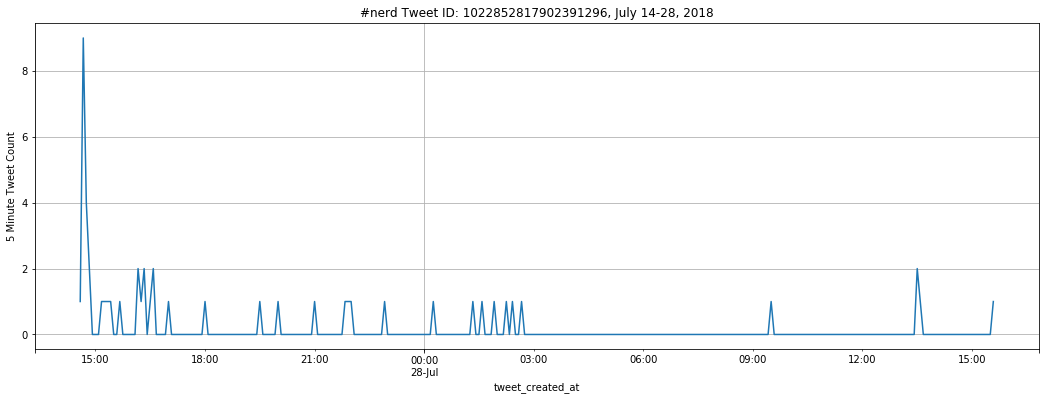

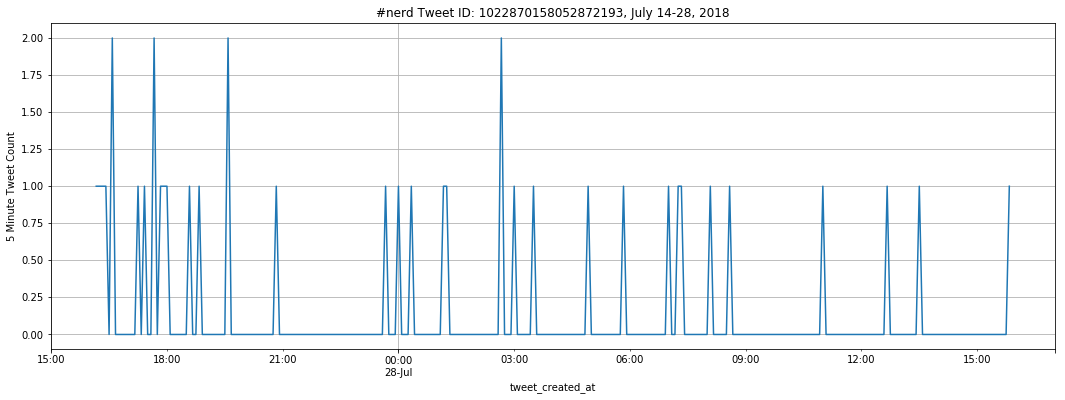

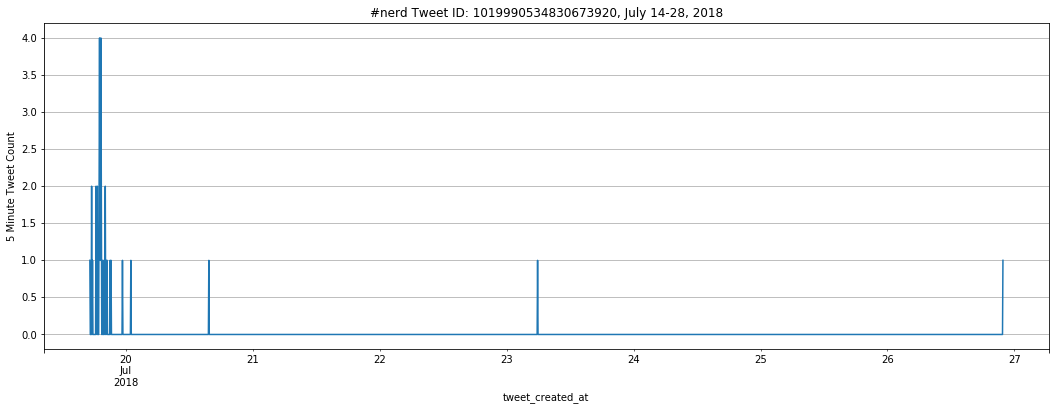

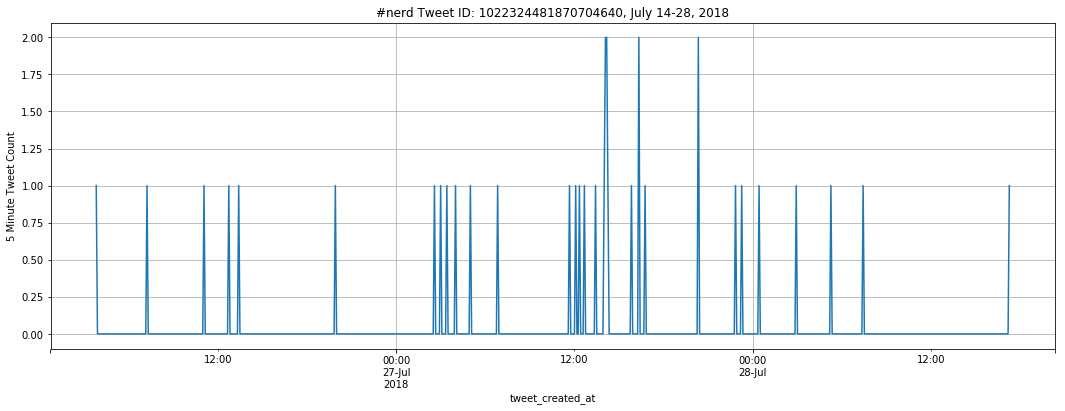

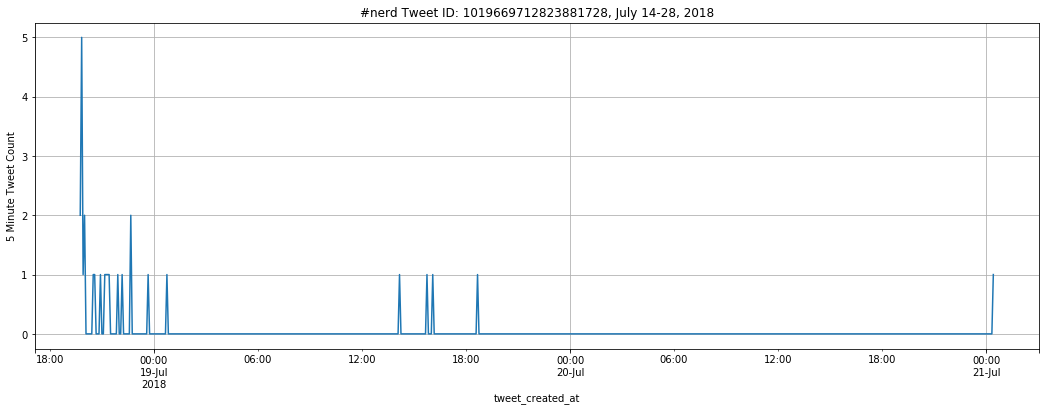

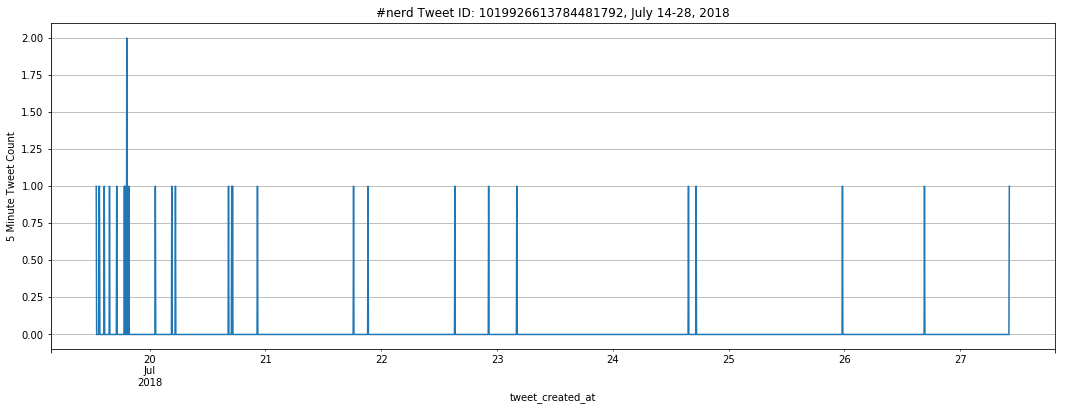

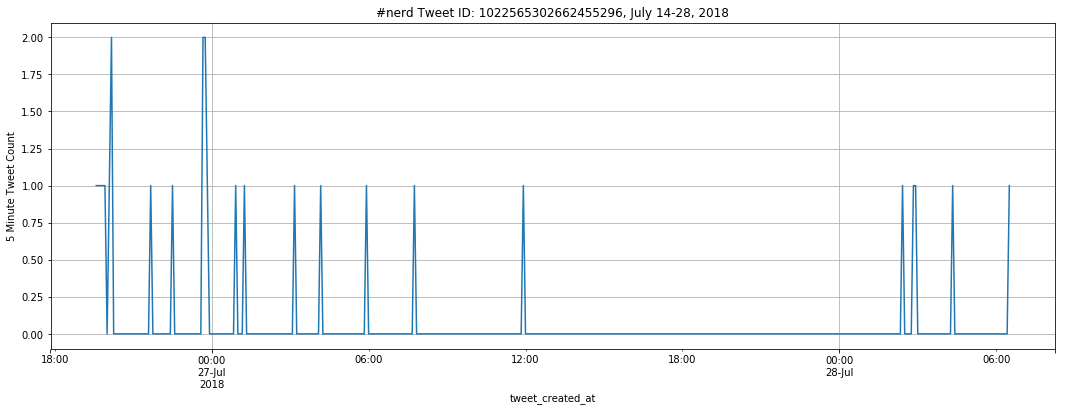

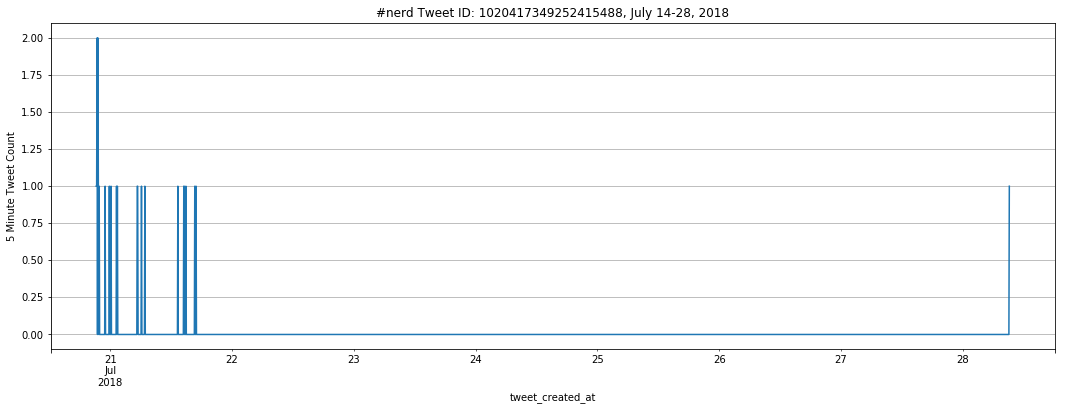

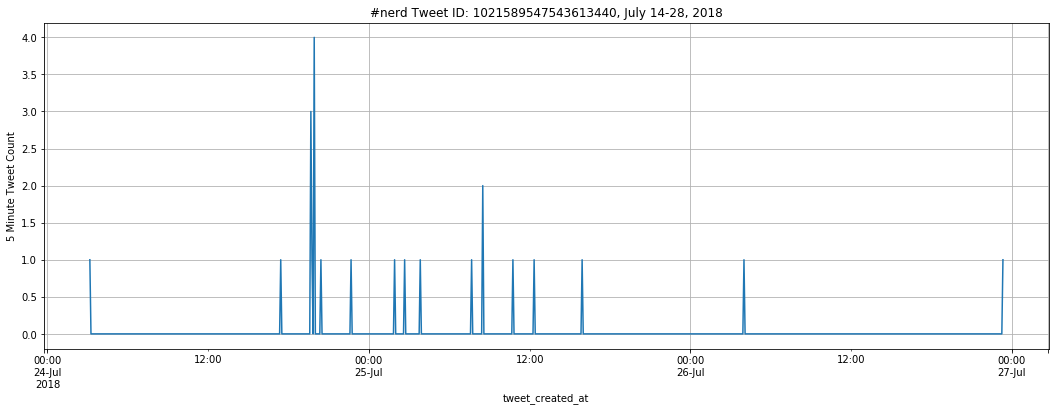

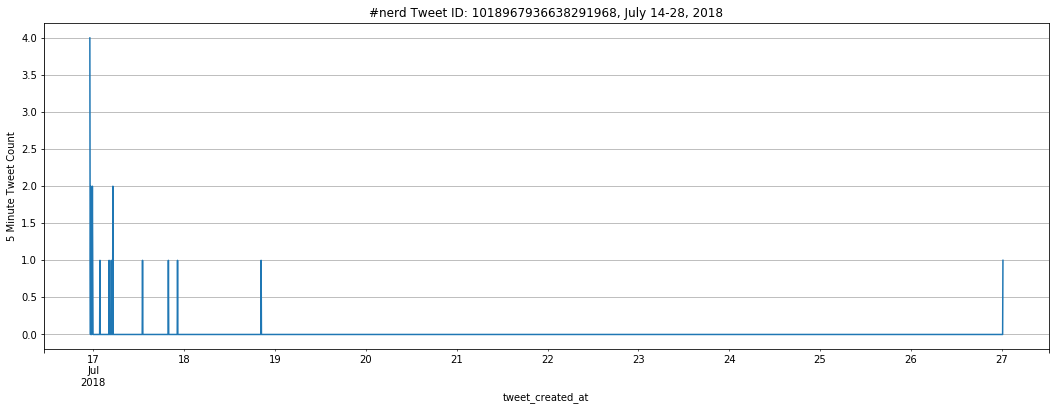

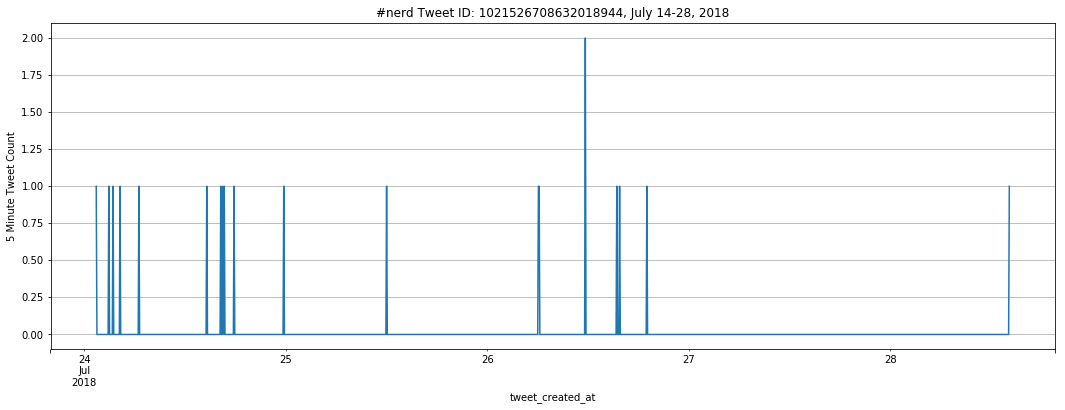

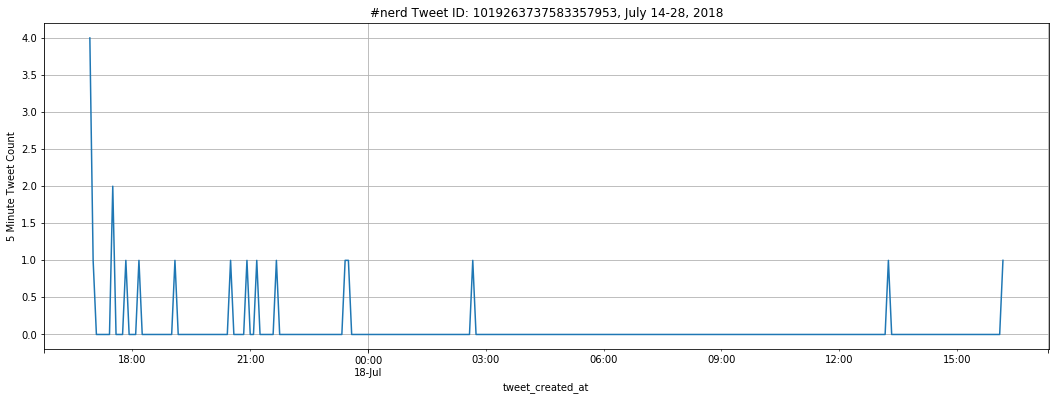

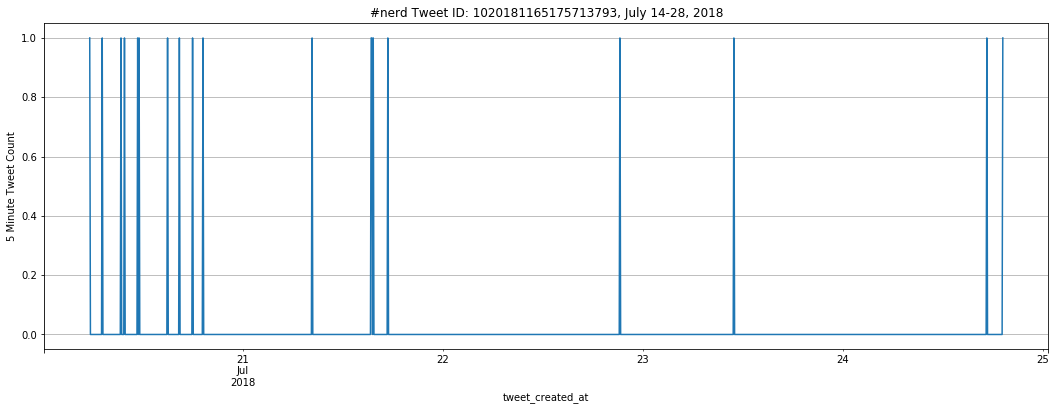

In [6]:
for top in range(20):
    tweetid = topretweets.iloc[top].retweet_id
    dftweettop = dftweet[dftweet.retweet_id==tweetid]
    plt.figure()
    dftweettop.groupby(pd.Grouper(key='tweet_created_at', freq='5Min', convention='start')).size().plot(figsize=(18,6))
    plt.ylabel('5 Minute Tweet Count')
    plt.title('#nerd Tweet ID: {}, July 14-28, 2018'.format(tweetid))
    plt.grid(True)
    plt.savefig("images/nerd_top20_tweet_" + str(tweetid) + "_freq_count+jul14to28_2018.png")